In [3]:
import pandas as pd
import sqlite3

In [4]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [22]:
query = """
select *
from checker
where uid like 'user_%'
"""

ch_users = pd.read_sql_query(query, conn, parse_dates=['timestamp'])

In [23]:
ch_users['hours'] = ch_users['timestamp'].dt.hour
ch_users['date'] = ch_users['timestamp'].dt.date


In [47]:
bins = [0, 4, 10, 17, 24]
labels = ['night', 'morning', 'day', 'evening']
ch_users['daytime'] = pd.cut(ch_users['hours'], bins=bins, labels=labels)
ch_users

,index,status,success,timestamp,numTrials,labname,uid,hours,date,daytime
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,5,2020-04-17,morning
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,5,2020-04-17,morning
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,5,2020-04-17,morning
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,5,2020-04-17,morning
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,5,2020-04-17,morning
...,...,...,...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1,20,2020-05-21,evening
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1,20,2020-05-21,evening
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1,20,2020-05-21,evening
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1,20,2020-05-21,evening


In [64]:
daytimes = ch_users.groupby(by=['date', 'daytime']).agg(commits=('daytime', 'count')).reset_index()
daytimes = daytimes.pivot(index='date', columns='daytime', values='commits')

/tmp/ipykernel_7245/3831539818.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daytimes = ch_users.groupby(by=['date', 'daytime']).agg(commits=('daytime', 'count')).reset_index()


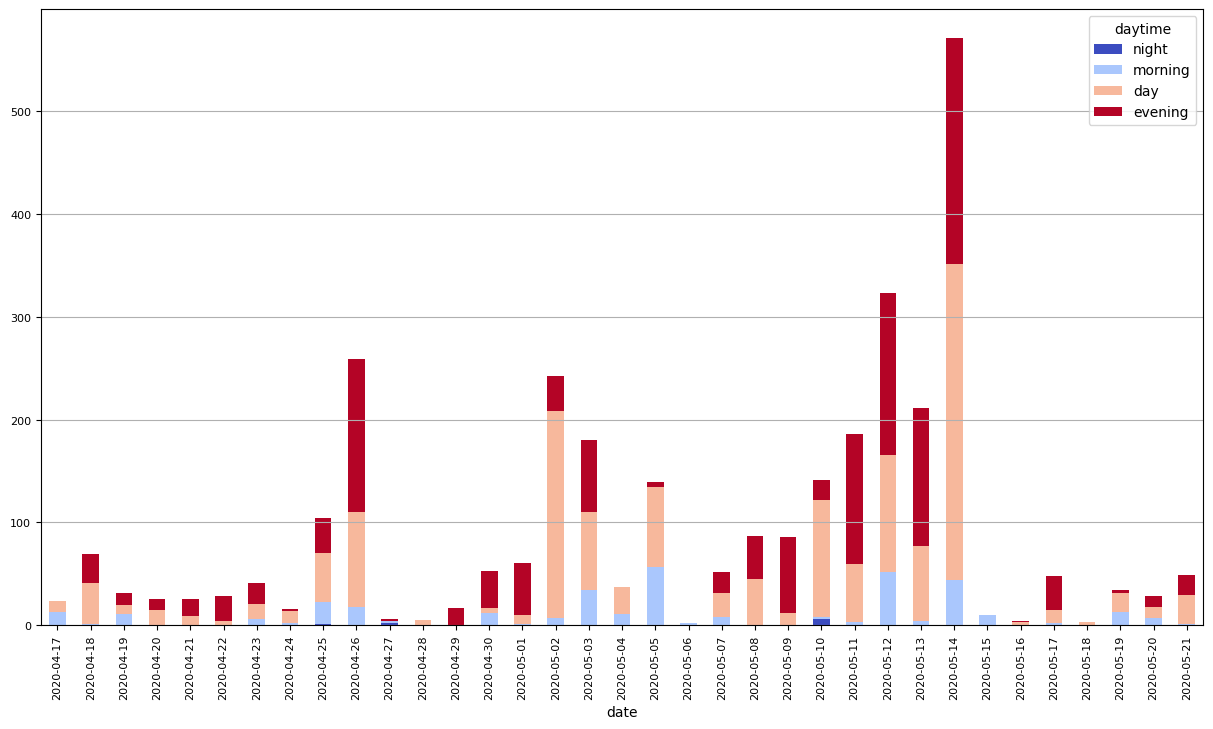

In [80]:
daytimes.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    fontsize=8,
    colormap='coolwarm',
    rot=90
).grid(axis='y')

In [81]:
conn.close()